In [2]:

library(data.table)
library(ggplot2)
library(reshape2)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [3]:
##ORIGINAL VISUALIZATION
#dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
dir='/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/'
out='atac.enrichment.pdf'


cts=c('pbmc','b', 'cm', 'ncm', 'nk','t4', 't8','pdc','cdc')
#cts=c('pbmc_cg','b_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg','cdc_cg','pdc_cg')



all.df=NULL
for(c in cts){
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_ifn_meta_.txt', sep=''),stringsAsFactors = FALSE)
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_ifn_euro.txt', sep=''),stringsAsFactors = FALSE)
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_ifn_meta_asian.txt', sep=''),stringsAsFactors = FALSE)
    res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_ifn_meta_L3.txt', sep=''),stringsAsFactors = FALSE)
    
    print(head(data.frame(res,ct=c)))
    res$W=as.numeric(res$W)
    all.df=rbind(all.df, data.frame(res, ct=c))
}
          
print(all.df)

all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.1]='*'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

#mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
mat=dcast(all.df.use, group ~ ct, value.var = 'W')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
row_names=rownames(mat)
print(mat)
mat_new=(mat)

#mat_new=mat[-which(rownames(mat) %in% c('EPI', 'progenitor','thymocyte')), ]
#mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting','thymo_resting')), ]
col_names=colnames(mat_new)
row_names=rownames(mat_new)
#mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting',"open")), ]
#mat_new=mat[-which(rownames(mat) %in% c("open")), ]
#print("new")
#print(mat_new)
##below is the correct scale, scales on peaks
#mat_newt <- t(apply(mat_new, 1, function(x){scale(x)}))
mat_new <- t(apply(mat_new, 1, function(x){scale(x)}))
#mat_new <- t(apply(mat_new, 1, function(x){(x)}))
#try a secondary scale to scale on eqtls
#mat_new <- t(apply(mat_newt, 2, function(x){scale(x)}))
#mat_new <- (apply(mat_new, 2, function(x){scale(x)}))


print('pre col')
#print(mat_new)
##for the original
colnames(mat_new)=col_names
rownames(mat_new)=row_names

#for the double
#colnames(mat_new)=row_names
#rownames(mat_new)=col_names
#mat_new=t(mat_new)

print('new names')
print(mat_new)
df.use=melt(mat_new)
#print(df.use)
df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]


print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    



order_var1=c('IFNB', 'IFNG')
#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg', 'prolif_cg','progen_cg','cm_cg', 'ncm_cg','pdc_cg','cdc_cg','pbmc_cg', 'ct.combined')
#order_var2=c( 'b','pb', 't4', 't8', 'nk', 'prolif','progen','cm', 'ncm','pdc','cdc','pbmc', 'AverageTissue','ct.combined')
order_var2=c( 'b','pb', 't4', 't8', 'nk', 'prolif','progen','cm', 'ncm','pdc','cdc','pbmc', 'ct.combined')

#order_var2=c( 'b_cg', 't4_cg', 't8_cg', 'nk_cg', 'cm_cg', 'ncm_cg','cdc_cg','pbmc_cg', 'ct.combined')


#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'cdc_cg',  'pdc_cg', 'progen_cg', 'prolif_cg','pbmc_cg', 'ct.combined')

#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'pdc','pbmc', 'ct.combined')
##FOR ORIGNAL
#df.use$Var1=factor(df.use$Var1, levels=order_var1)
#df.use$Var2=factor(df.use$Var2, levels=order_var2)

#for double
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)
#df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]

           W      pval group   ct
1 2210602288 0.3709692  IFNB pbmc
2 1907966008 0.3426536  IFNG pbmc
           W      pval group ct
1 2311426586 0.7490454  IFNB  b
2 1936744880 0.9993649  IFNG  b
           W      pval group ct
1 2199941372 0.9839524  IFNB cm
2 1866071124 0.9998111  IFNG cm
           W      pval group  ct
1 2355535168 0.1529461  IFNB ncm
2 2008992501 0.4450676  IFNG ncm
           W      pval group ct
1 2224343207 0.9248292  IFNB nk
2 1927767520 0.8095319  IFNG nk
           W         pval group ct
1 2321952610 0.0005208595  IFNB t4
2 1976258459 0.0239093384  IFNG t4
           W       pval group ct
1 2268467292 0.78246742  IFNB t8
2 2010962388 0.01511019  IFNG t8
        W       pval group  ct
1 1564488 0.09483822  IFNB pdc
2 1023108 0.84788392  IFNG pdc
           W      pval group  ct
1 2305621372 0.3050141  IFNB cdc
2 1982140859 0.5089830  IFNG cdc
            W         pval group   ct
1  2210602288 0.3709692203  IFNB pbmc
2  1907966008 0.3426535701  IFNG pbmc
3

In [4]:
df.use

Var1,Var2,value,pair,pval_sig
<fct>,<fct>,<dbl>,<chr>,<chr>
IFNB,pbmc,0.2480635,IFNB pbmc,.
IFNG,pbmc,0.2647355,IFNG pbmc,.
IFNB,b,0.3807887,IFNB b,.
IFNG,b,0.3088663,IFNG b,.
IFNB,cm,0.2340295,IFNB cm,.
IFNG,cm,0.2004919,IFNG cm,.
IFNB,ncm,0.4388533,IFNB ncm,.
IFNG,ncm,0.4196542,IFNG ncm,.
IFNB,nk,0.2661521,IFNB nk,.


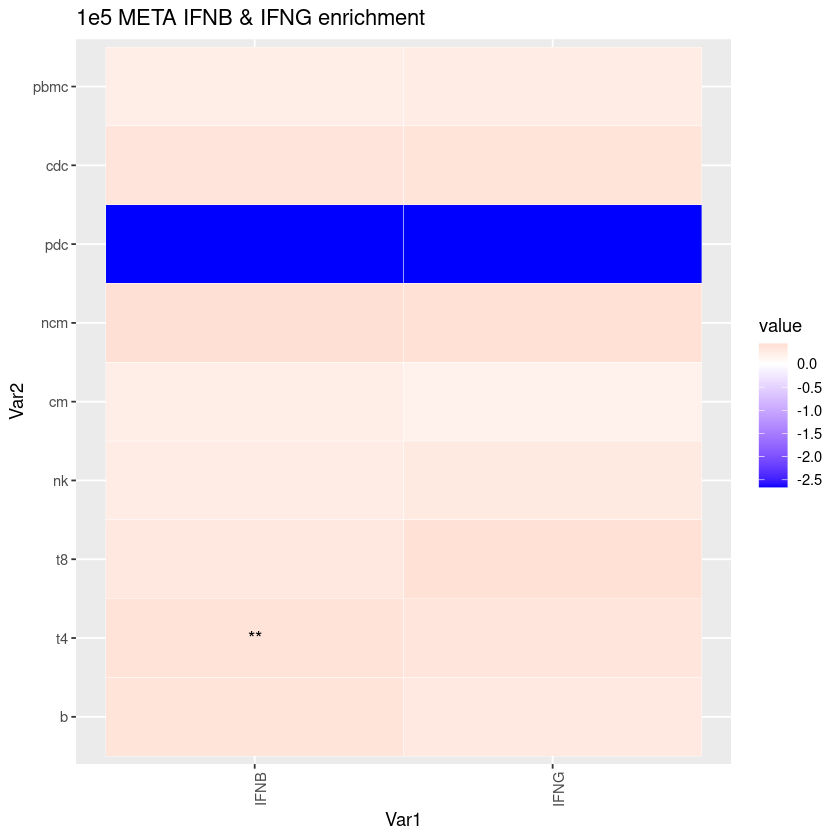

In [5]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META IFNB & IFNG enrichment")
print(plt)

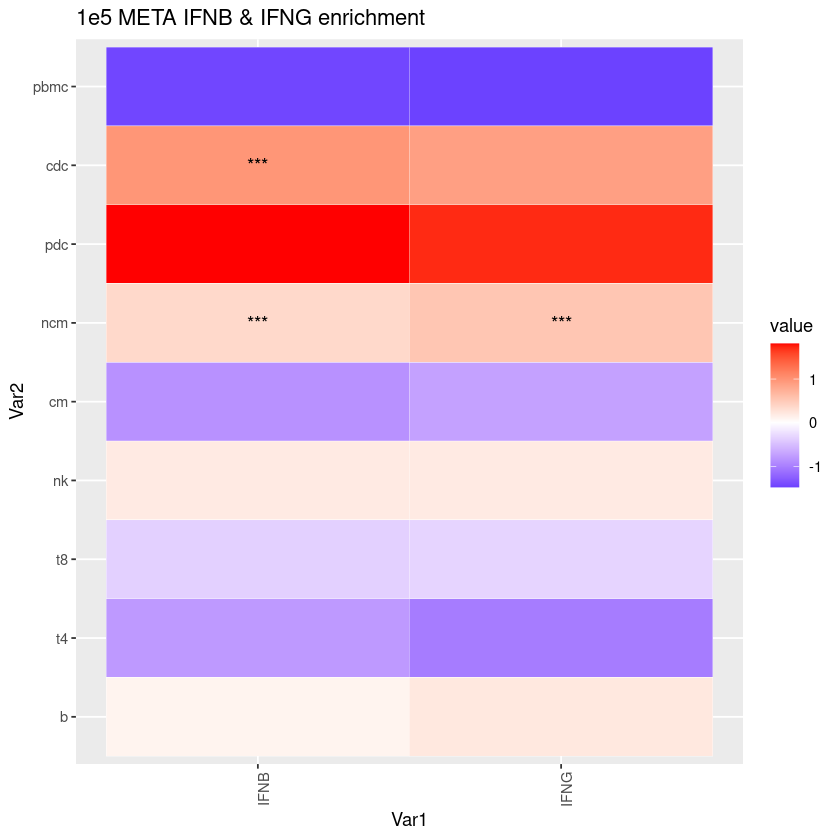

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META IFNB & IFNG enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_reqtl_IFN_meta_all_1e5.png'),dpi = 300,width=5, height=4)


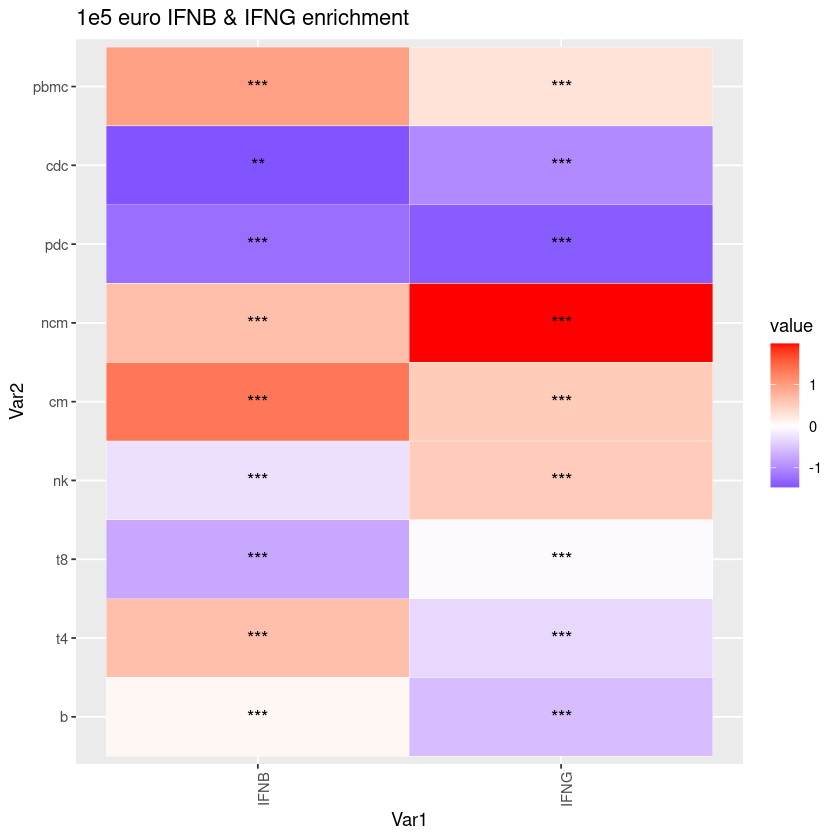

In [6]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 euro IFNB & IFNG enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_reqtl_IFN_euro_all_1e5.png'),dpi = 300,width=5, height=4)


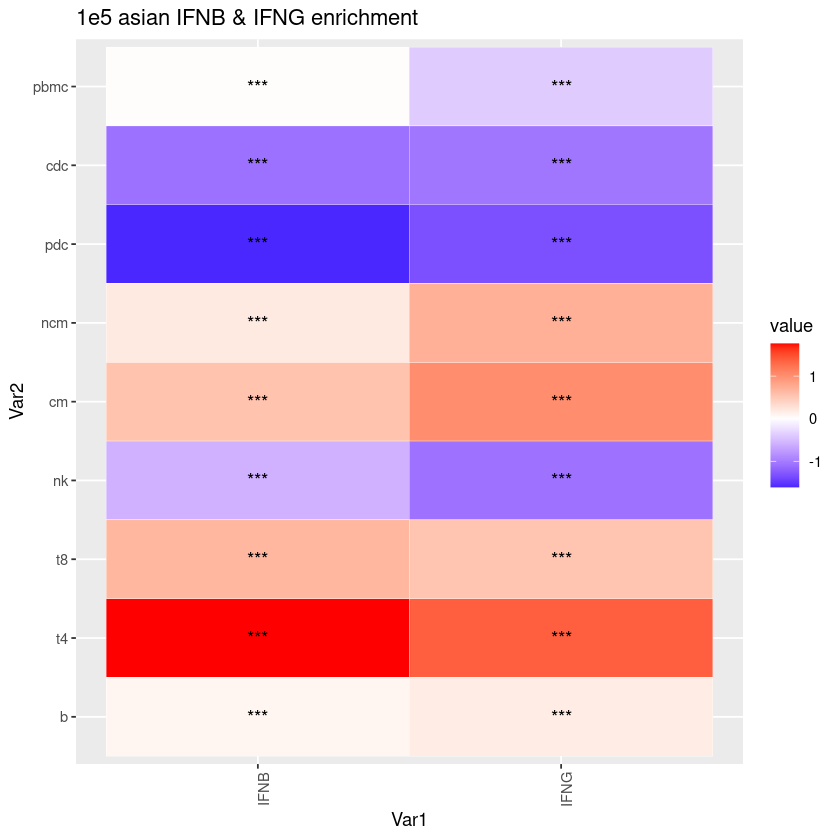

In [8]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 asian IFNB & IFNG enrichment")
print(plt)

ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_reqtl_IFN_asian_all_1e5.png'),dpi = 300,width=5, height=4)


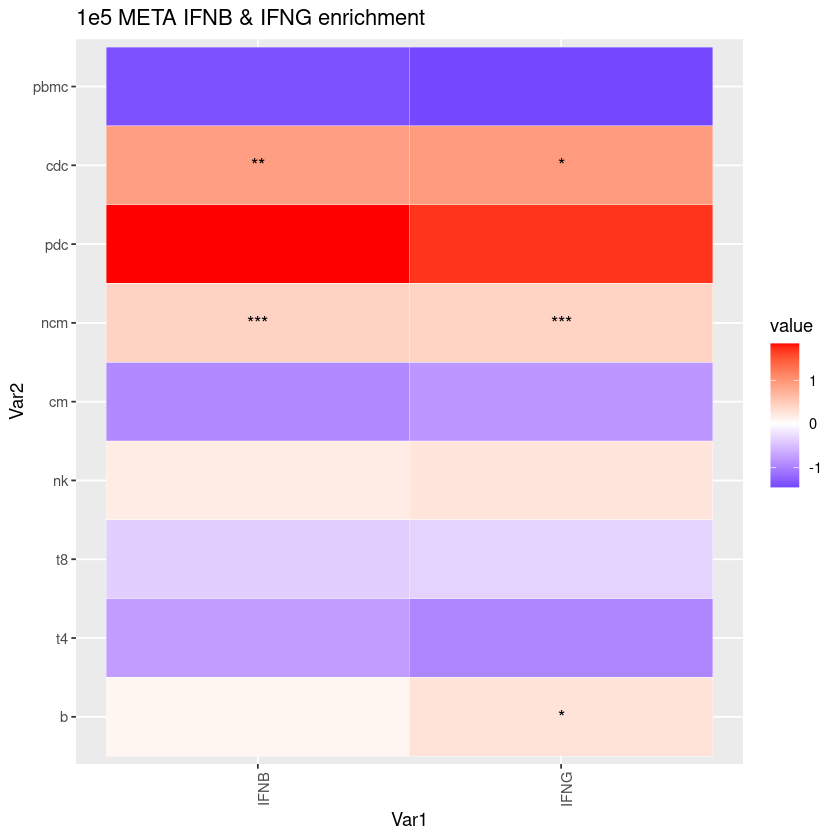

In [60]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META IFNB & IFNG enrichment")
print(plt)

ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_reqtl_IFN_meta_all_1e5.png'),dpi = 300,width=5, height=4)


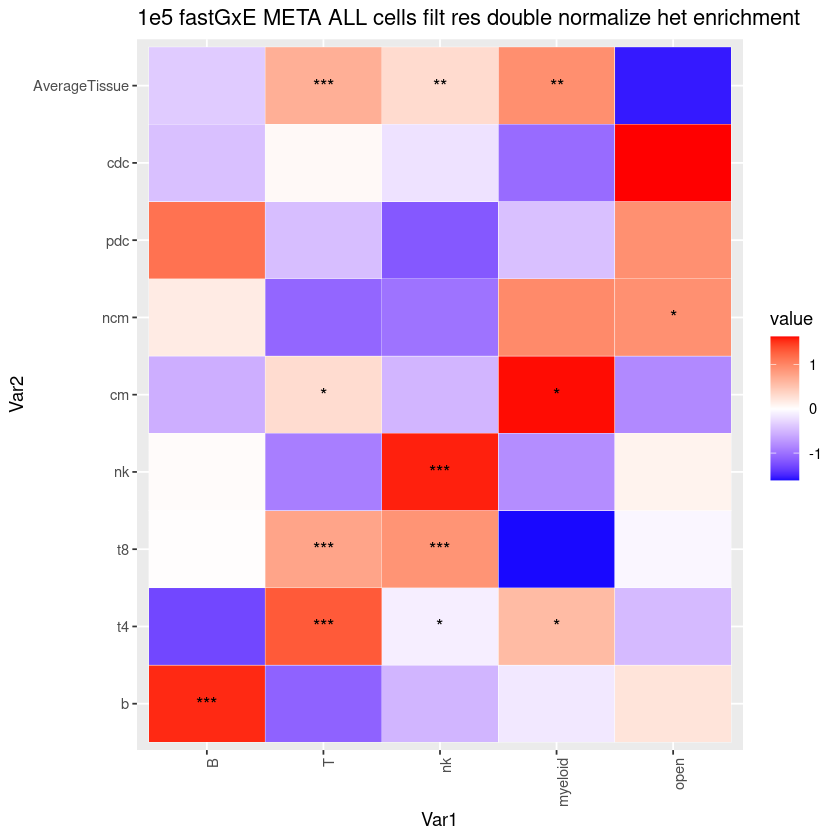

In [42]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res double normalize het enrichment")
print(plt)

ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_meta_all_1e5.png'),dpi = 300,width=5, height=4)


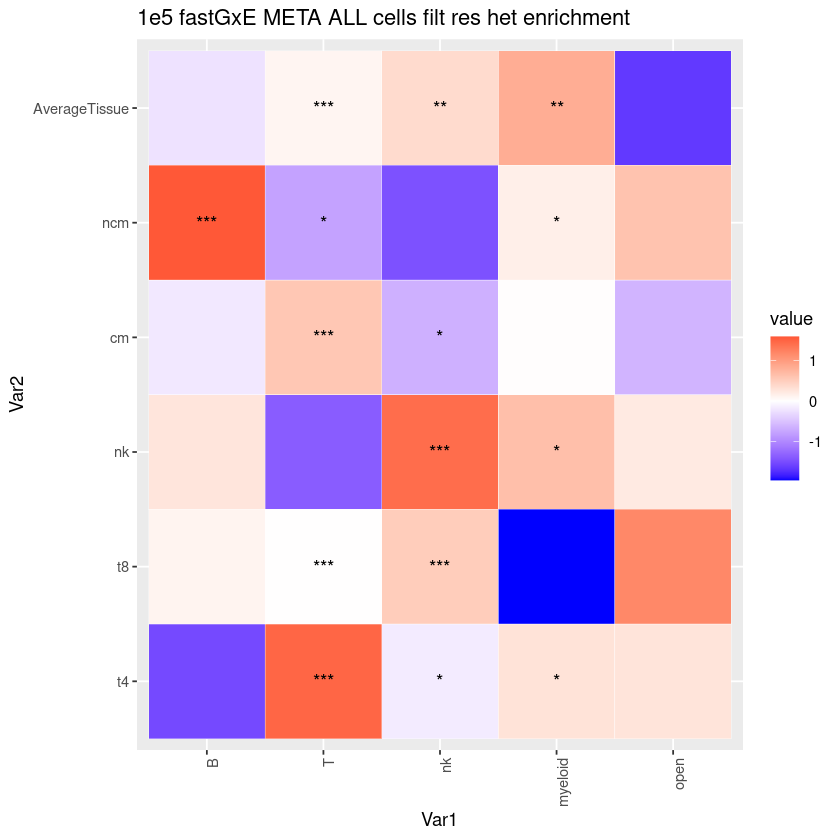

In [16]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)


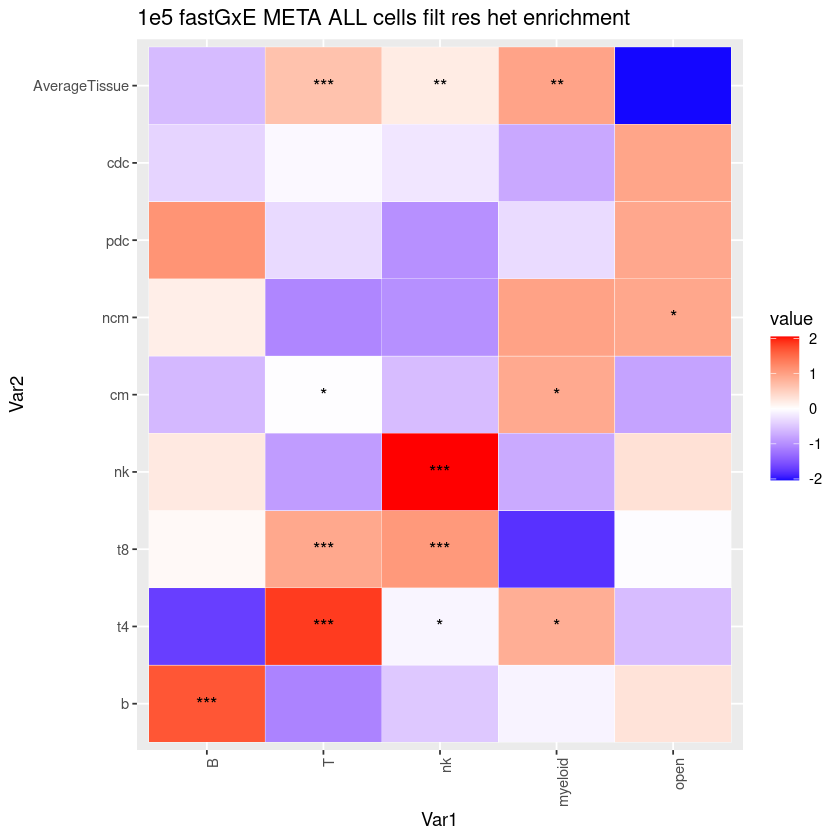

In [19]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)

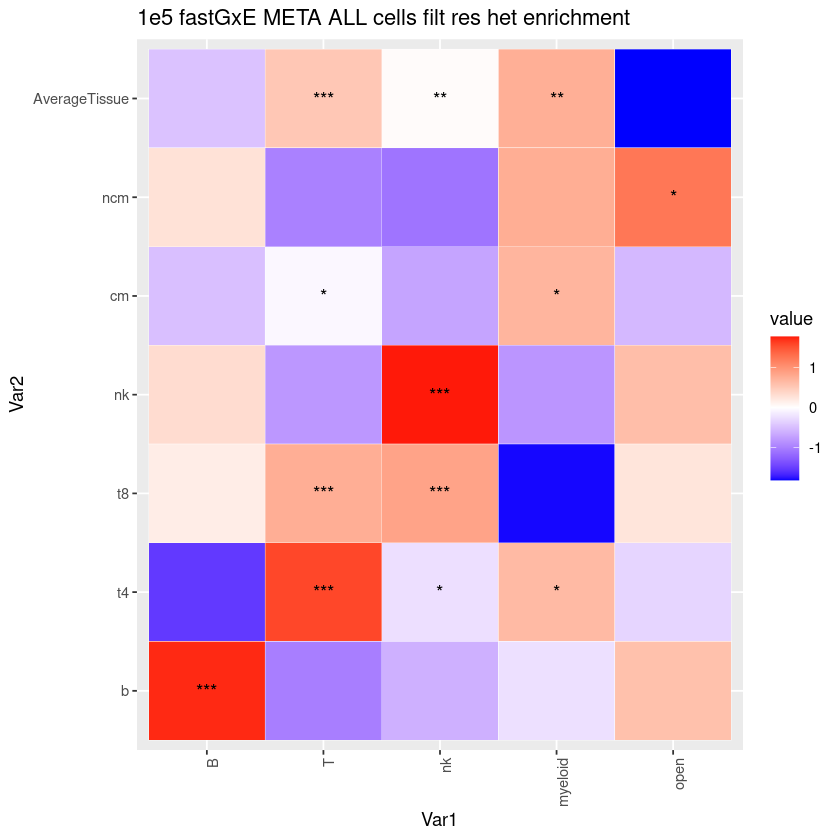

In [12]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)

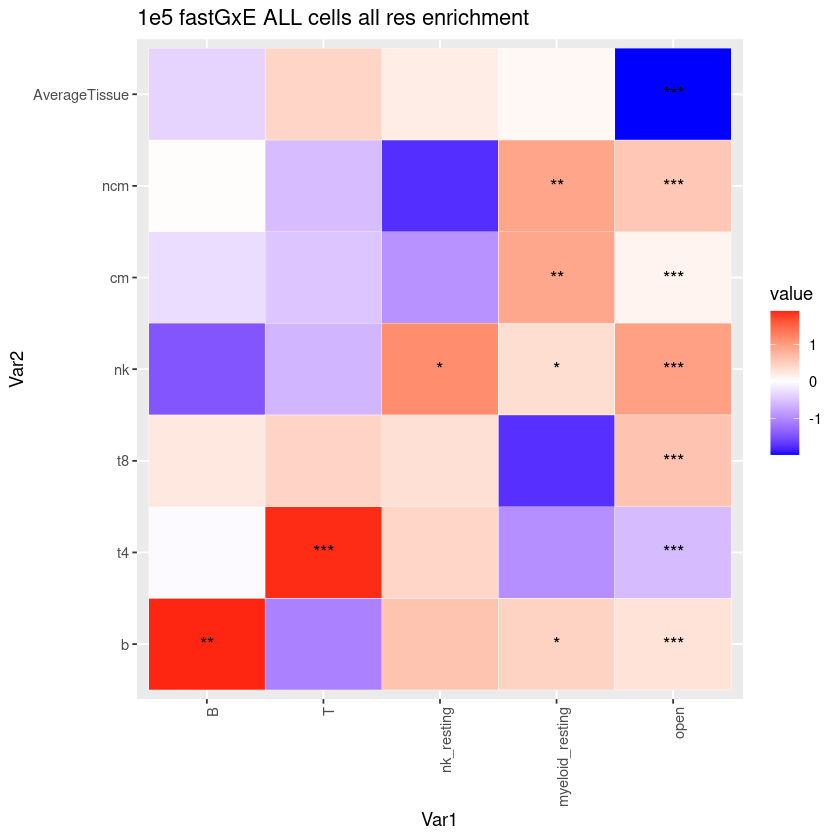

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE ALL cells all res enrichment")
print(plt)

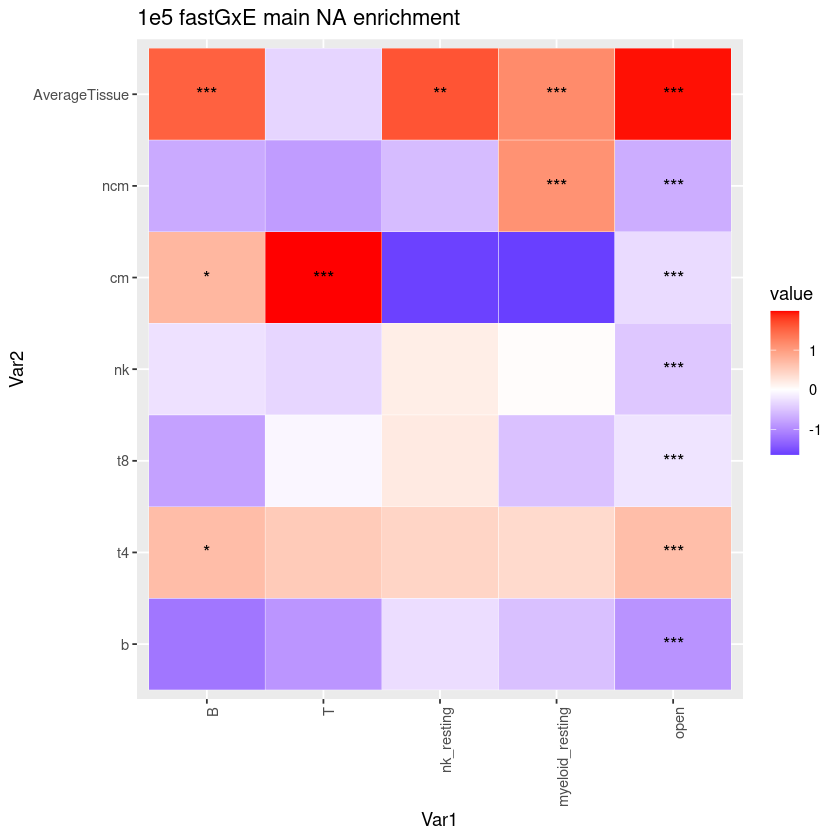

In [5]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE main NA enrichment")
print(plt)

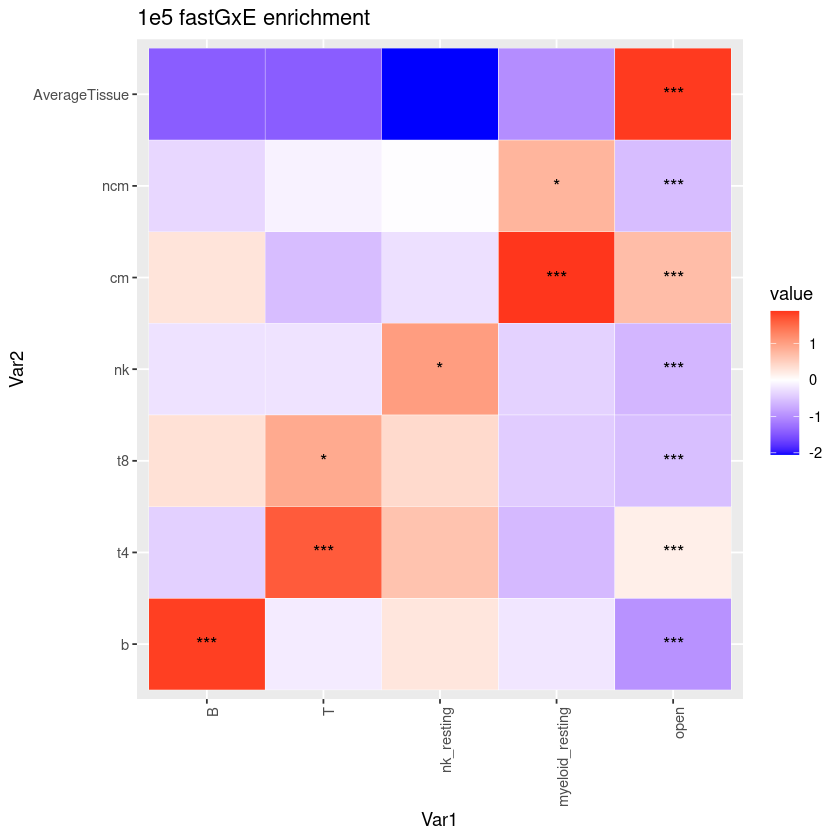

In [9]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)

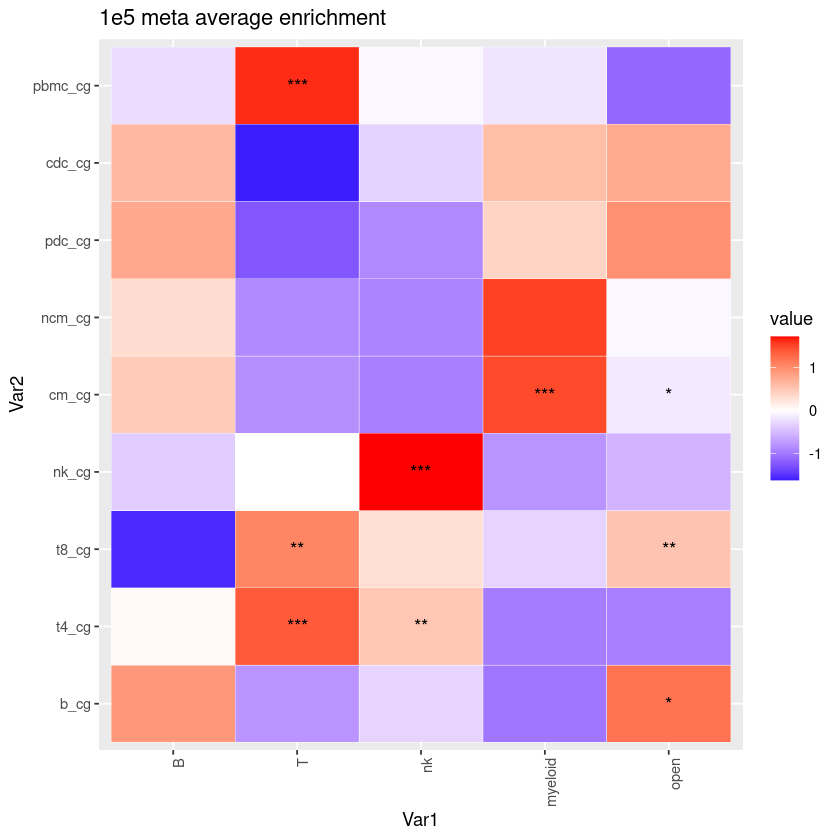

In [10]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 meta average enrichment")
print(plt)


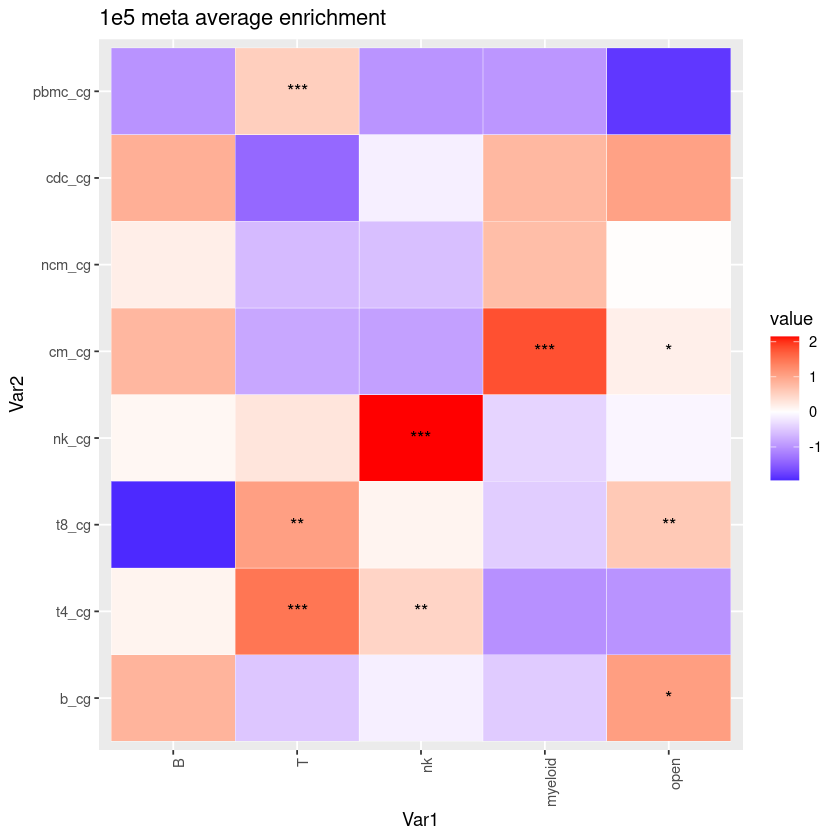

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 meta average enrichment")
print(plt)

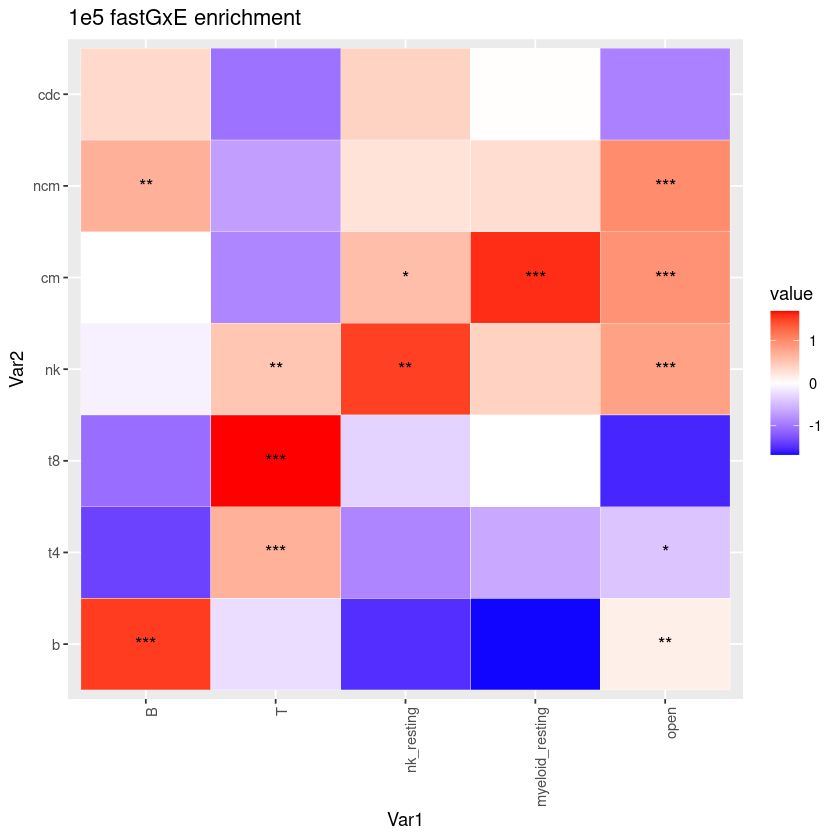

In [8]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)

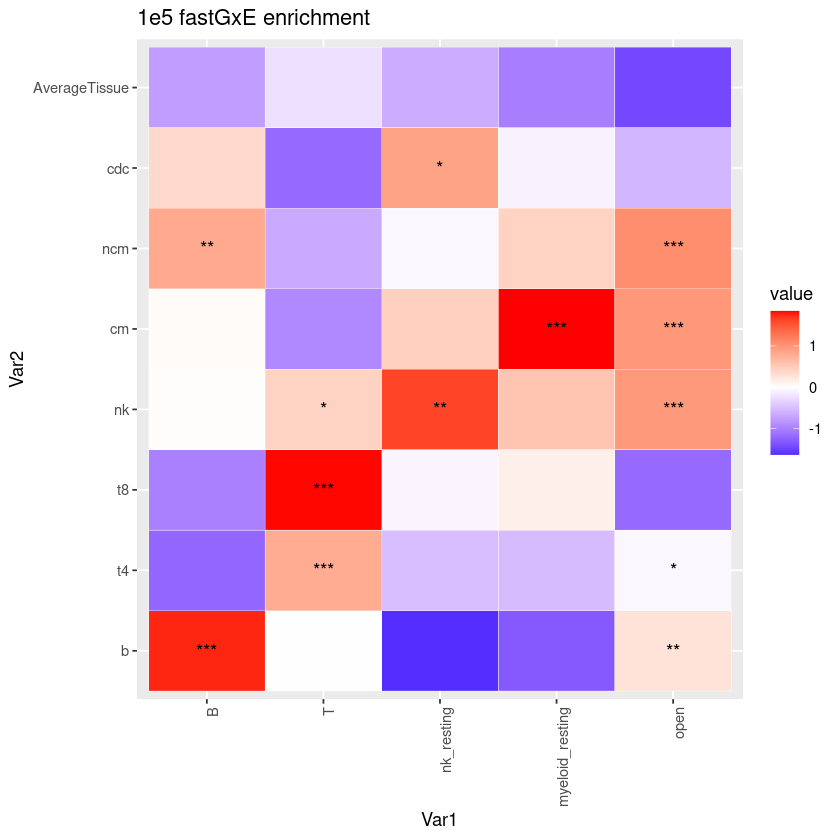

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_euro_1e5.png'),dpi = 300,width=4, height=4)


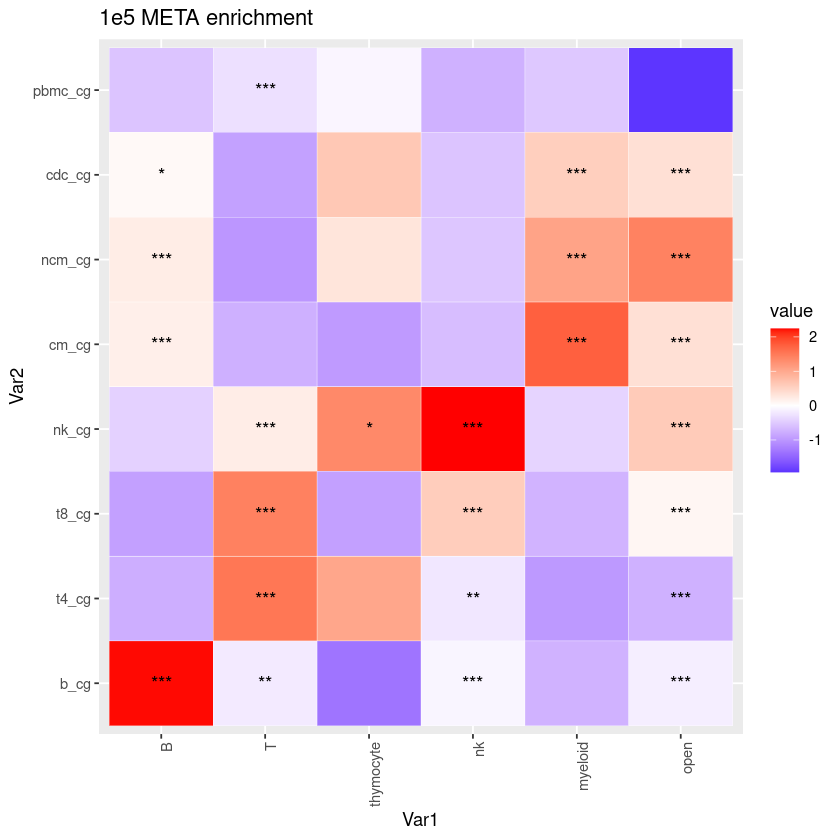

In [16]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)

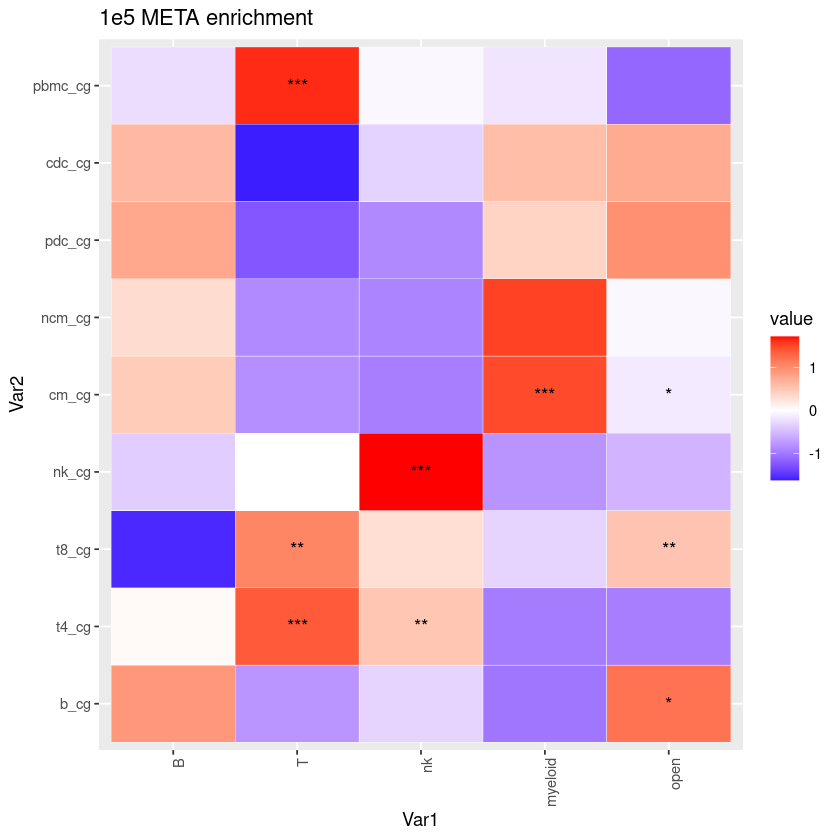

In [11]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_vanilla_meta_all_1e5.png'),dpi = 300,width=5, height=4)


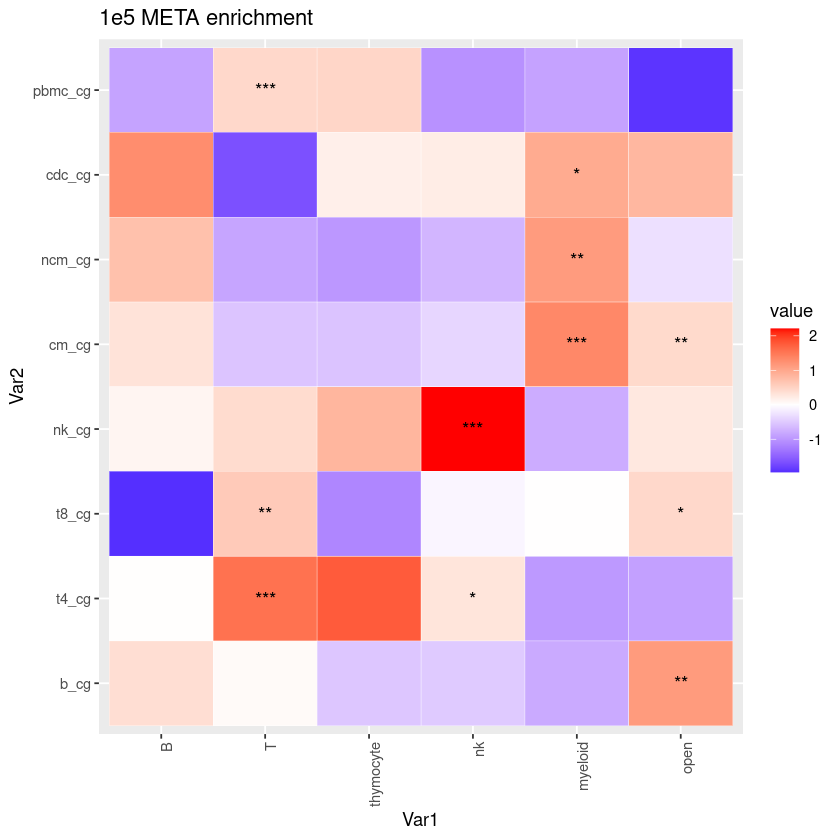

In [9]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)


In [17]:
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_meta_simp.png'),dpi = 300,width=4, height=4)

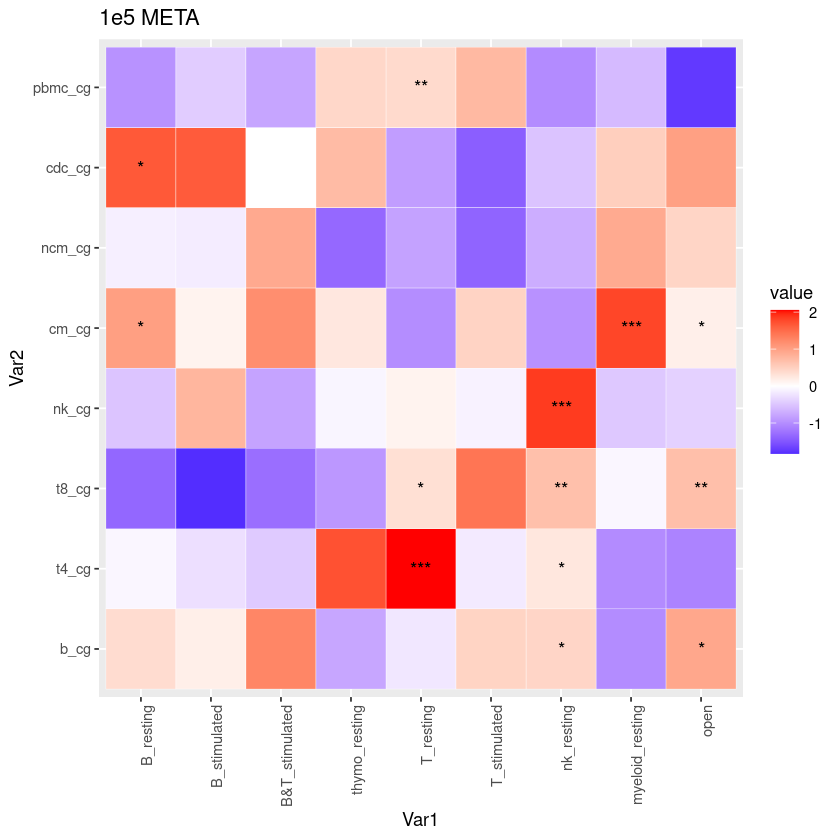

In [20]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_meta.png'),dpi = 300,width=4, height=4)


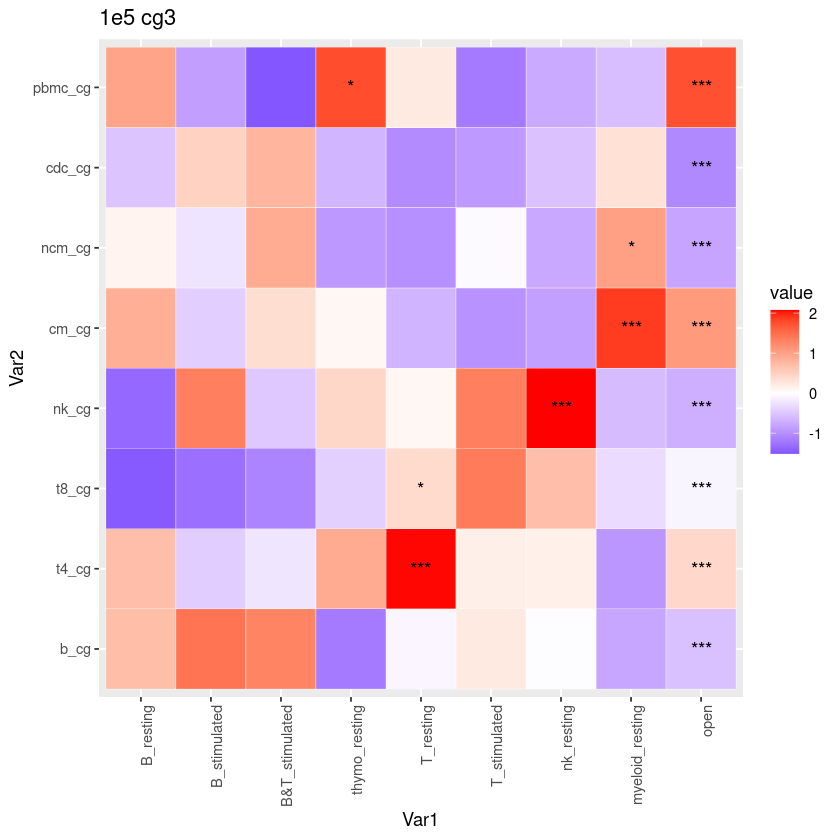

In [31]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 cg3")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_cg3.png'),dpi = 300,width=4, height=4)


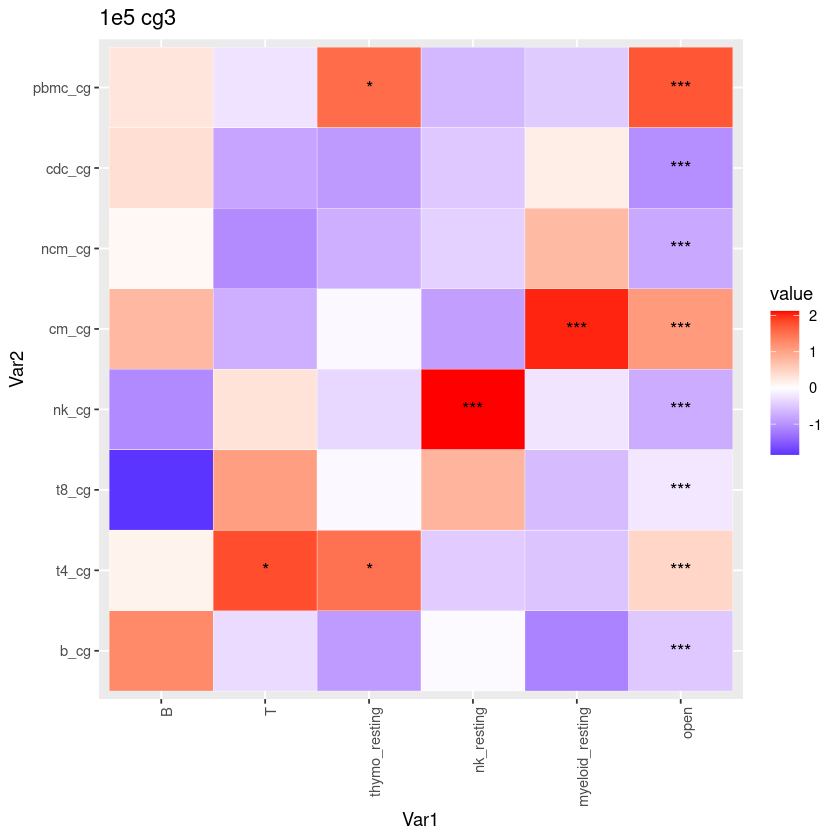

In [29]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 cg3")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_cg3_simple.png'),dpi = 300,width=4, height=4)


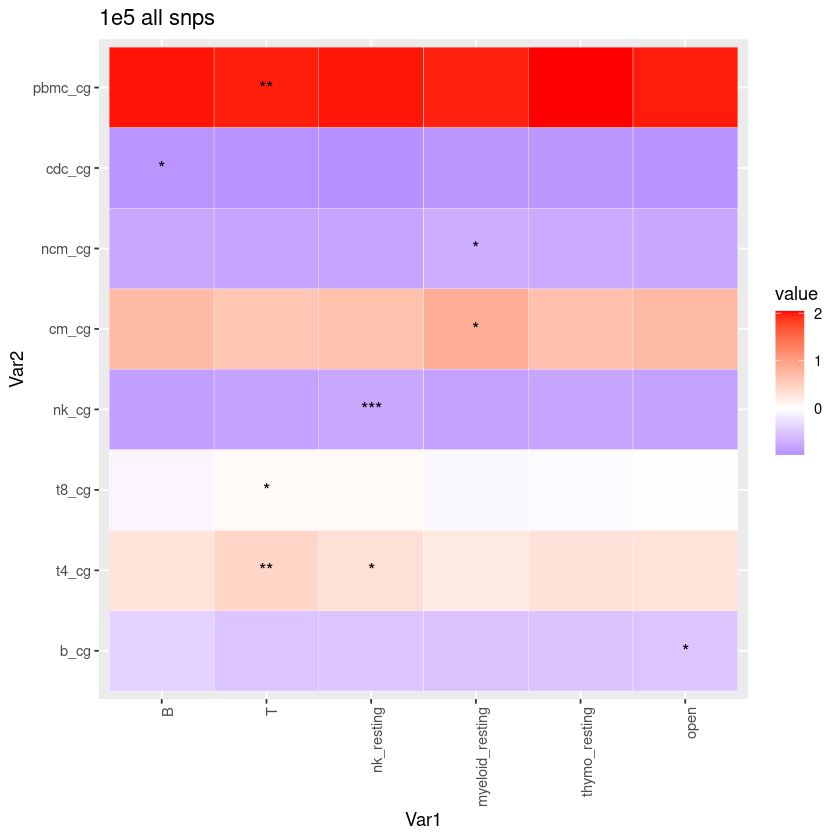

In [11]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

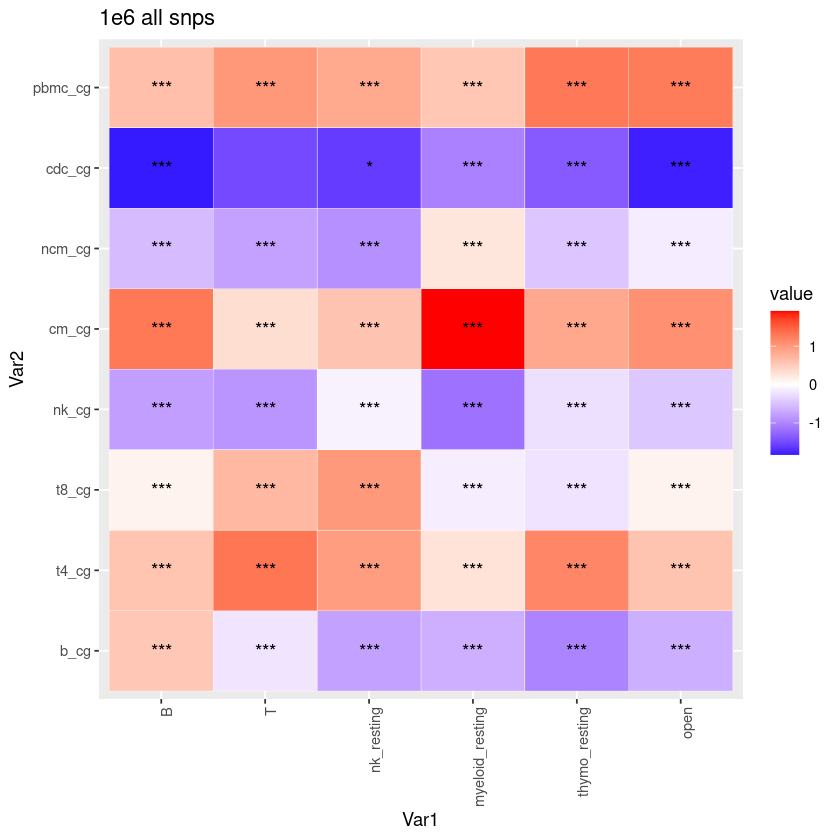

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

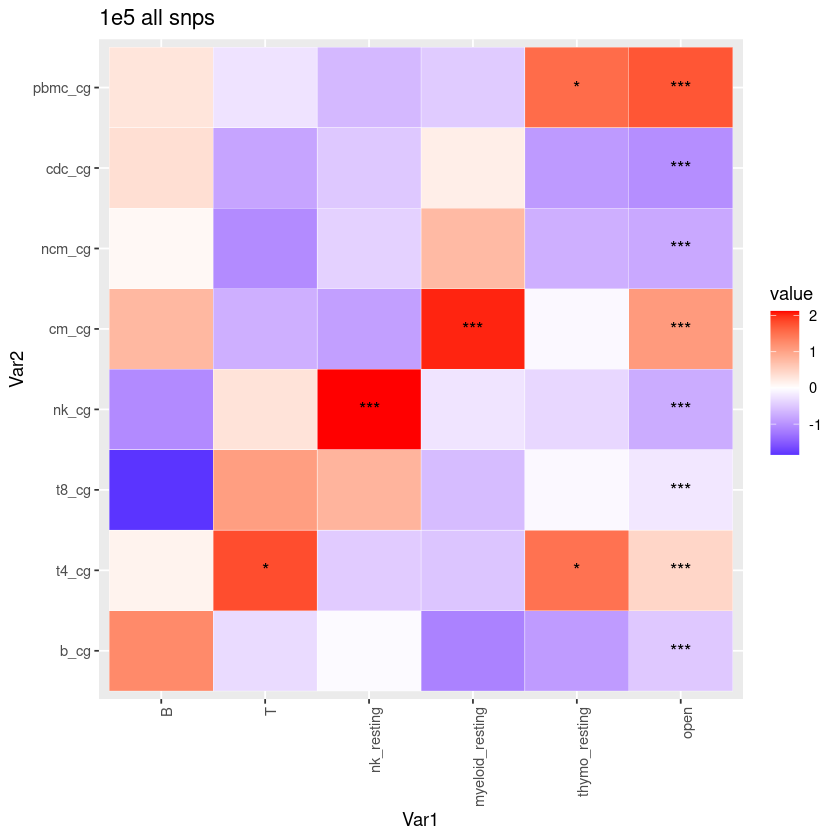

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)